# Let's Code by ADA
# Projeto - Módulo de Estatística II

## Treinamento de Modelo por Regressão Linear

**Aluno:** Willker Menezes da Rocha<br>
**Professor:** Rogério Mainardes

#### Dataset: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo


Este Dataset aborda os impactos de diversas variáveis sobre o consumo de cerveja (que será o "target"/Y do modelo). O objetivo é que o modelo preveja o consumo médio de cerveja de acordo com o input de algumas variáveis (X's). A amostra é de uma área universitária da cidade de São Paulo - SP, do ano de 2015, com indivíduos de 18 a 28 anos de idade.

### Metadados:<br>


- **data** - Data
- **temp_media** - Temperatura Média (°C)
- **temp_min** - Temperatura Mínima (°C)
- **temp_max** - Temperatura Máxima (°C)
- **chuva** - Precipitação (mm)
- **fds** - Final de Semana (1 = Sim; 0 = Não)
- **consumo** - Consumo de Cerveja (litros)

In [1]:
# Importando as bibliotecas

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Aparência do Dataset

df = pd.read_csv("Consumo_cerveja.csv",sep=';')

df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [3]:
df.shape

(365, 7)

## Análise Exploratória dos Dados

### Propriedades dos Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [5]:
df.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


In [6]:
# Checando dados nulos

df.isnull().sum()

data          0
temp_media    0
temp_min      0
temp_max      0
chuva         0
fds           0
consumo       0
dtype: int64

In [7]:
# Definindo a Matriz de Correlação

df.corr(numeric_only=True).round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


<AxesSubplot: >

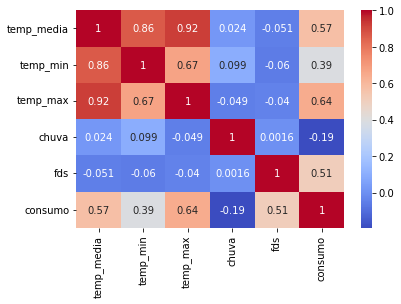

In [8]:
# Plotando a matriz em um heatmap

matriz_corr = df.corr(numeric_only=True)

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')

## Comportamento do target (Variável Dependente)

### Gráficos

In [9]:
# Desempacotando as tuplas

x,y = (28,11)

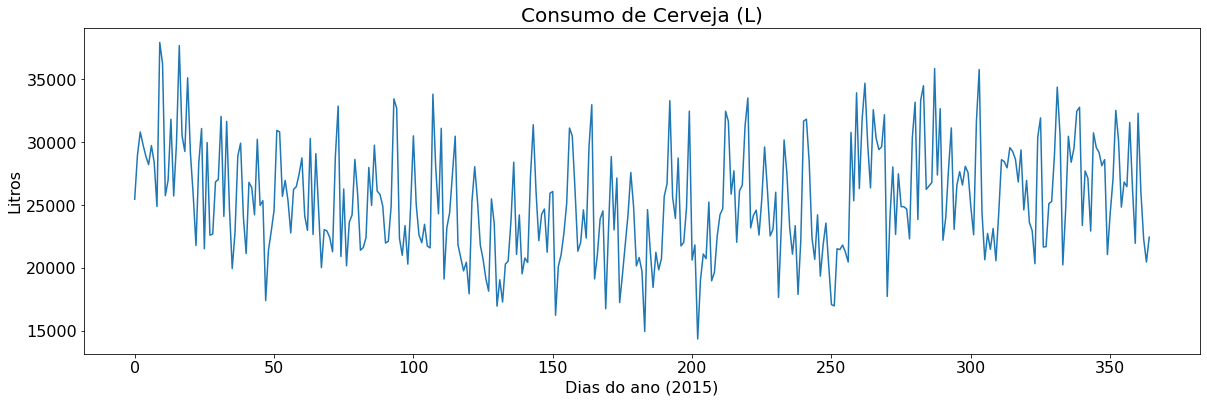

In [10]:
fig,ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja (L)',fontsize=20)
ax.set_ylabel('Litros',fontsize=16)
ax.set_xlabel('Dias do ano (2015)',fontsize=16)
ax = df['consumo'].plot(fontsize=16)

É possível observar uma sazonalidade com picos nos finais de semana.

### Boxplot

<AxesSubplot: title={'center': 'Consumo de Cerveja (L)'}, ylabel='Litros'>

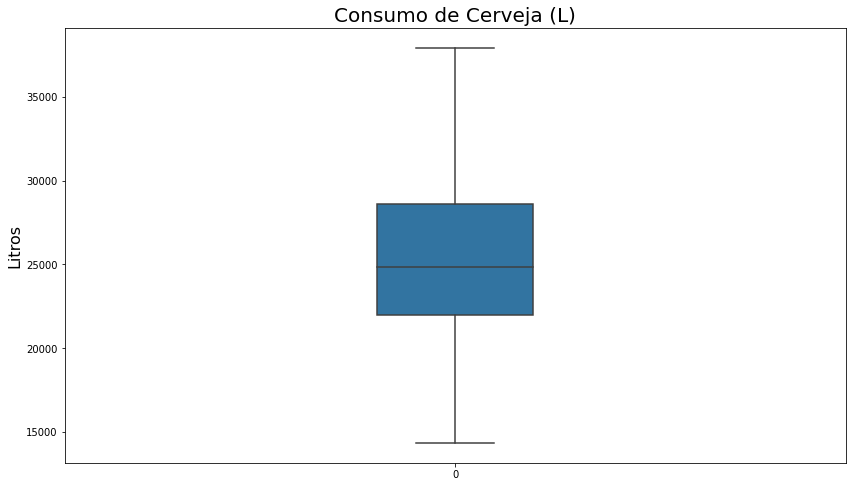

In [11]:
ax = sns.boxplot(data=df['consumo'],orient='v',width=0.2)
ax.figure.set_size_inches(14,8)
ax.set_title('Consumo de Cerveja (L)',fontsize=20)
ax.set_ylabel('Litros',fontsize=16)
ax

Não se observa a presença de outliers.

<AxesSubplot: title={'center': 'Consumo de Cerveja (L)'}, xlabel='Fim de semana', ylabel='consumo'>

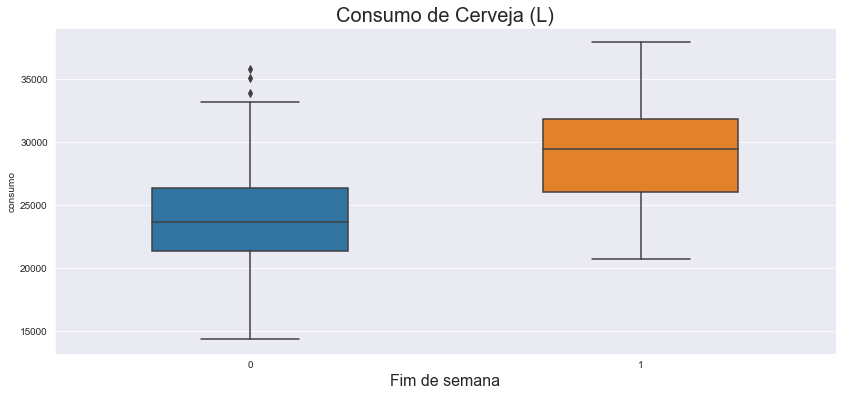

In [12]:
# Fiz uma análise melhor do target para evidenciar o comportamento sazonal
# Comparei o target com a variável "Fim de Semana"

sns.set_style('darkgrid')

ax = sns.boxplot(y='consumo',x='fds',data=df,orient='v',width=0.5)
ax.figure.set_size_inches(14,6)
ax.set_title('Consumo de Cerveja (L)',fontsize=20)
ax.set_xlabel('Fim de semana',fontsize=16)
ax

Se observam alguns valores outliers. Eu pensei sobre e imaginei que fossem feriados.

### Histograma - Distribuição de Frequências

<AxesSubplot: title={'center': 'Consumo Cerveja'}, xlabel='Fim de Semana', ylabel='Consumo de cerveja (L)'>

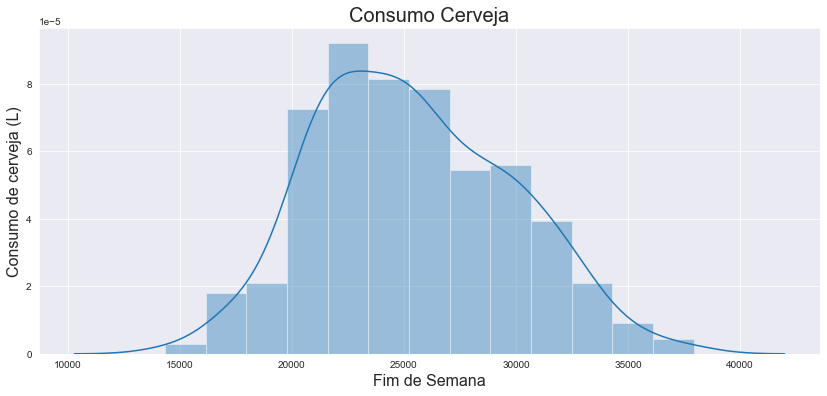

In [13]:
ax = sns.distplot(df['consumo'])
ax.figure.set_size_inches(14,6)
ax.set_title('Consumo Cerveja',fontsize=20)
ax.set_ylabel('Consumo de cerveja (L)',fontsize=16)
ax.set_xlabel('Fim de Semana',fontsize=16)
ax

### Dispersão - Váriável Independente x Dependentes

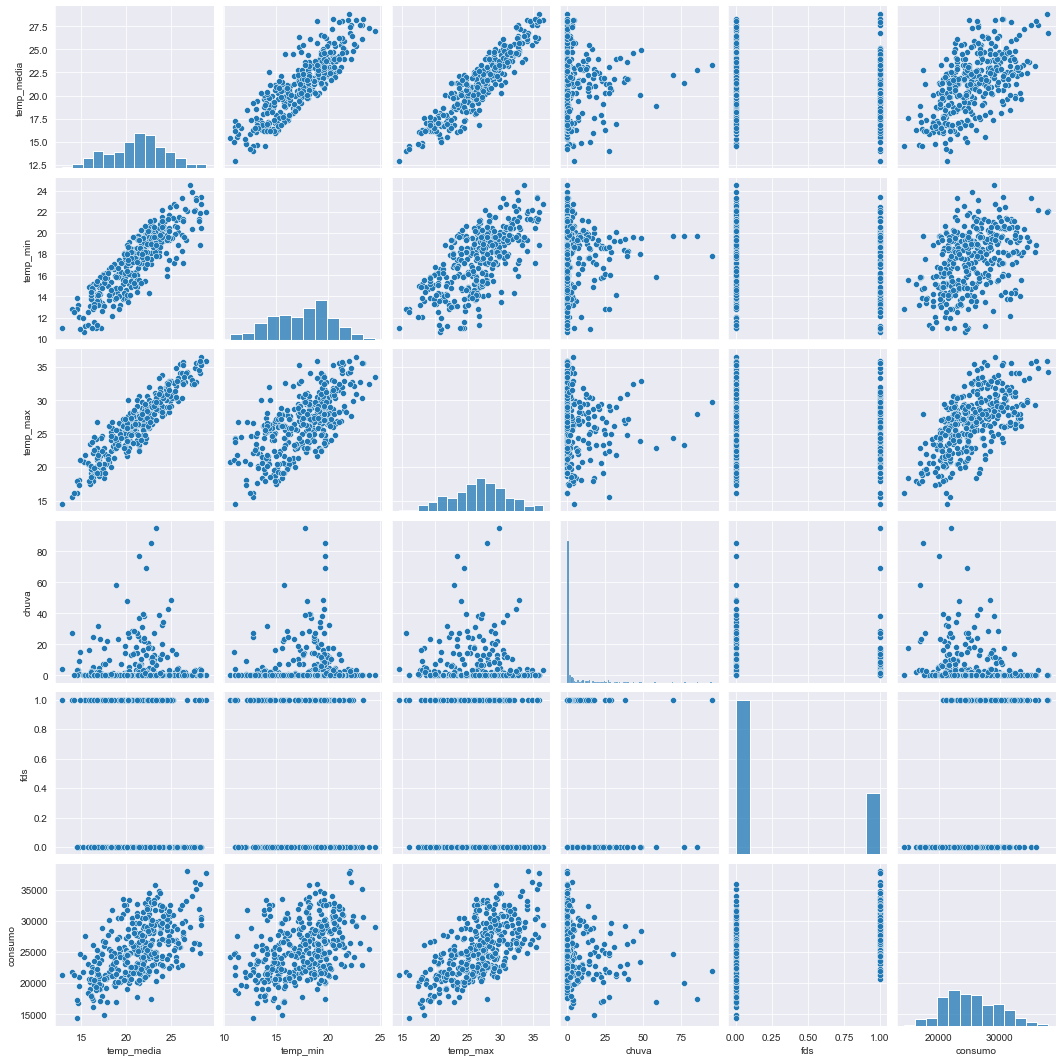

In [14]:
ax = sns.pairplot(df)

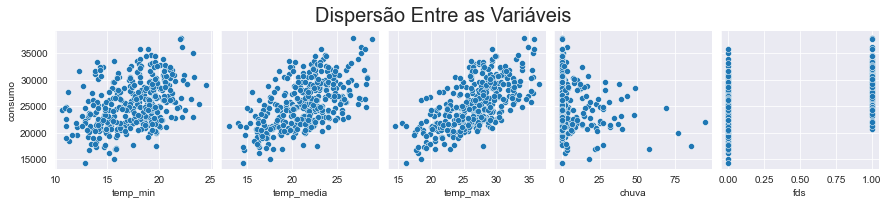

In [15]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'])
ax.fig.suptitle('Dispersão Entre as Variáveis',fontsize=20,y=1.1)
ax

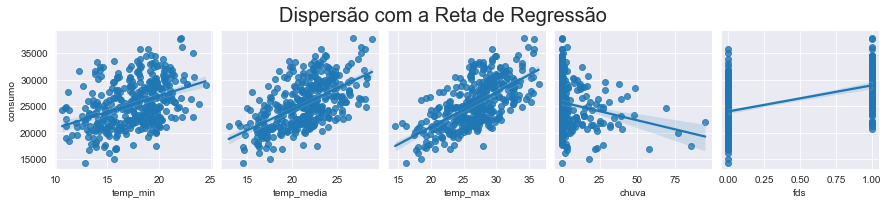

In [16]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'],kind='reg')
ax.fig.suptitle('Dispersão com a Reta de Regressão',fontsize=20,y=1.1)
ax

### Jointplot

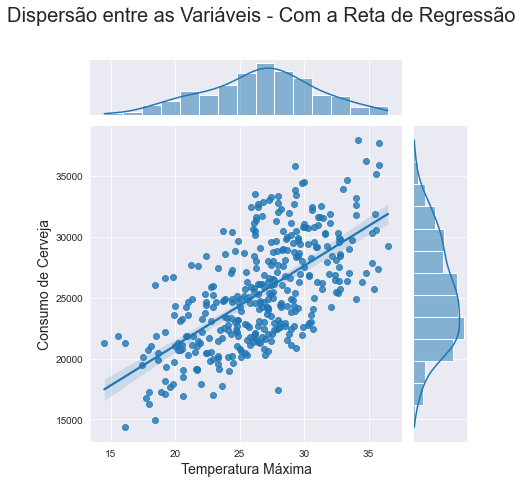

In [17]:
ax = sns.jointplot(x='temp_max',y='consumo',data=df,kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis - Com a Reta de Regressão',fontsize=20,y=1.1)
ax.set_axis_labels('Temperatura Máxima','Consumo de Cerveja',fontsize=14)
ax

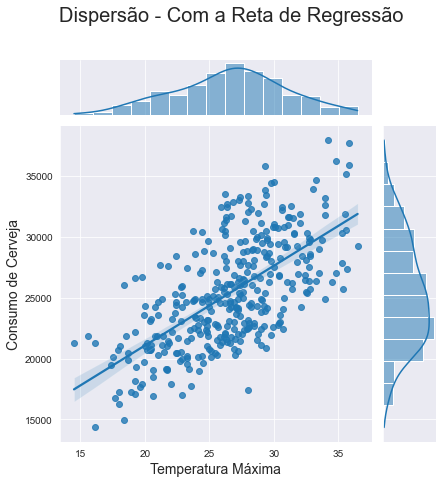

In [18]:
ax = sns.jointplot(x='temp_max',y='consumo',data=df,kind='reg')
ax.fig.suptitle('Dispersão - Com a Reta de Regressão',fontsize=20,y=1.1)
ax.set_axis_labels('Temperatura Máxima','Consumo de Cerveja',fontsize=14)
ax

Arriscando um lmplot:

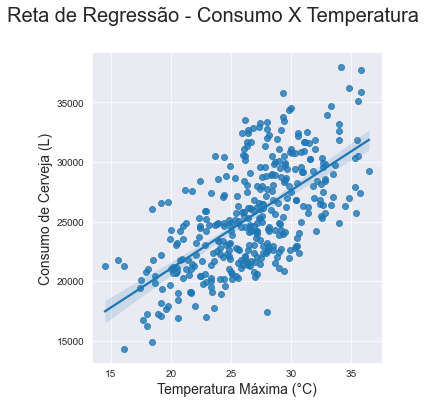

In [19]:
ax = sns.lmplot(x='temp_max',y='consumo',data=df)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura',fontsize=20,y=1.1)
ax.set_xlabels('Temperatura Máxima (°C)',fontsize=14)
ax.set_ylabels('Consumo de Cerveja (L)',fontsize=14)
ax

lmplot com Terceira Variável:

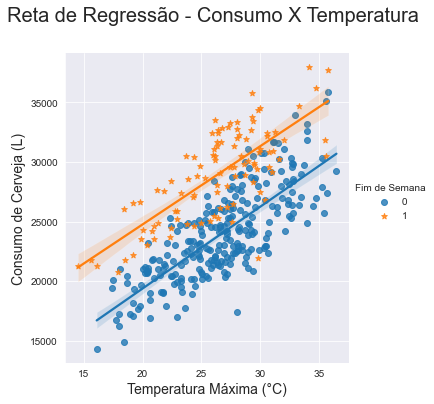

In [20]:
ax = sns.lmplot(x='temp_max',y='consumo',data=df, hue='fds',markers=['o','*'],legend=False)

ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura',fontsize=20,y=1.1)
ax.set_xlabels('Temperatura Máxima (°C)',fontsize=14)
ax.set_ylabels('Consumo de Cerveja (L)',fontsize=14)
ax.add_legend(title='Fim de Semana')
ax

Aqui é possível ver claramente a variação do consumo de acordo com o momento da semana.

# Implementação do Modelo de Regressão Linear

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Uma série pra armazenar o target (consumo)

y = df['consumo']

In [23]:
# Dataframe para as outras variáveis

X = df[['temp_max','chuva','fds']]

In [24]:
# Datasets de Treino e de Teste (70/30)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2811)

### Tamanhos das amostras de treino e de teste:

In [25]:
X_train.shape

(255, 3)

In [26]:
X_test.shape

(110, 3)

In [27]:
X_train.shape[0] + X_test.shape[0]

365

In [28]:
X.shape[0] * 0.7

# Evidenciando que os tamanhos batem

255.49999999999997

In [29]:
X.shape[0] * 0.3

# Evidenciando que os tamanhos batem

109.5

### Trazendo o sklearn

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
modelo = LinearRegression()

In [32]:
# Fitando o modelo para fazer a estimativa usando os dados de Treino

modelo.fit(X_train, y_train)

LinearRegression()

### Obtendo o score R² com os dados de Treino

In [33]:
print(f"R² = {(modelo.score(X_train,y_train).round(2))}")

R² = 0.73


### Gerando previsões com os dados de Teste

In [34]:
y_previsto = modelo.predict(X_test)

### Obtendo o score R² das previsões do modelo

In [35]:
print(f"R² = {metrics.r2_score(y_test,y_previsto).round(2)}")

R² = 0.69


## Definindo o Intercepto/Variável independente

In [36]:
modelo.intercept_ #Beta1

5951.9763393124485

### Coeficientes de Regressão

In [37]:
modelo.coef_ # Beta2, Beta3 e Beta4

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [38]:
# Confirmando a ordem

index = ['Intercepto','Temperatura Máxima','Chuva(mm)','Final de semana']
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_).round(2),index=index,columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.98
Temperatura Máxima,684.74
Chuva(mm),-60.78
Final de semana,5401.08


### Interpretação:

**- Intercepto** - Excluindo o efeito das outras variáveis, o efeito médio no Consumo de Cerveja seria de **6432,09** litros.<br>
**- Temperatura Máxima (°C)** - Mantendo-se os valores de "Chuva" e "Fim de Semana" constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de **668,54** litros.<br>
**- Chuva (mm)** - Mantendo-se os valores de "Temperatura Máxima" e "Fim de Semana" constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de **-57,49** litros.<br>
**- Final de Semana (Sim/Não)** - Mantendo-se os valores de "Temperatura Máxima" e "Chuva" constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de **5184,08** litros.

## Gráficos das Previsões

In [39]:
y_previsto_train = modelo.predict(X_train)

### Valor Estimado  x  Valor Real

<AxesSubplot: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

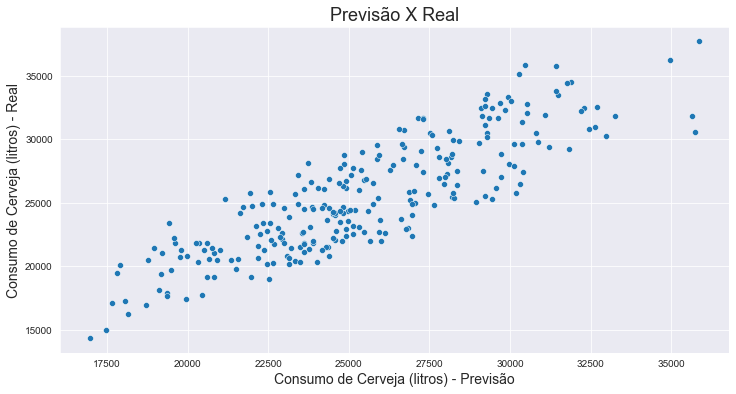

In [40]:
ax = sns.scatterplot(x=y_previsto_train,y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real',fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real',fontsize=14)
ax

## Análise dos Resíduos

In [41]:
residuo = y_train - y_previsto_train

### Valor Estimado  x  Resíduos

<AxesSubplot: title={'center': 'Resíduo X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduo'>

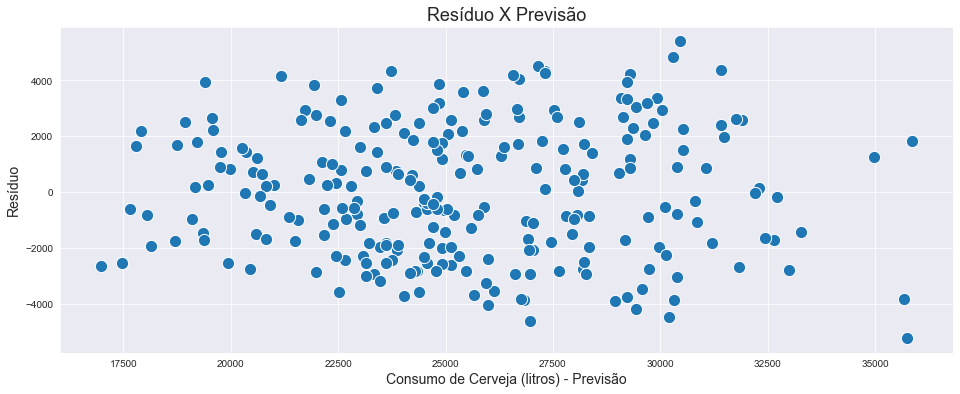

In [42]:
ax = sns.scatterplot(x=y_previsto_train,y=residuo,s=150)
ax.figure.set_size_inches(16,6)
ax.set_title('Resíduo X Previsão',fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduo',fontsize=14)
ax

### Resíduo ao quadrado

<AxesSubplot: title={'center': 'Resíduo X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduo²'>

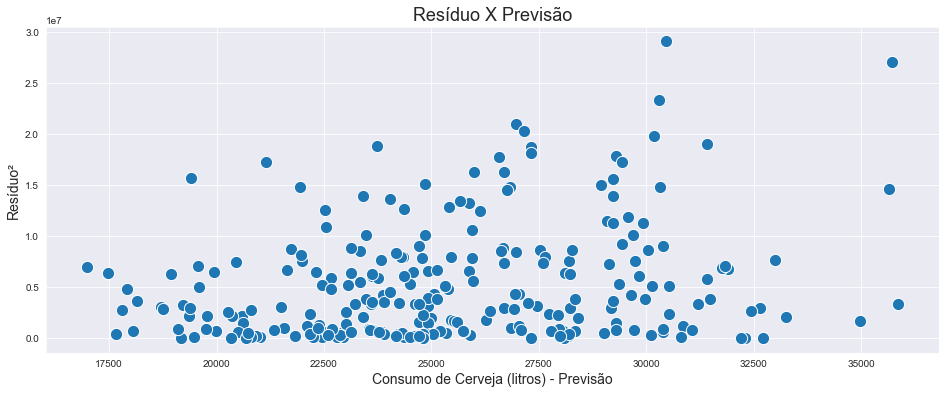

In [43]:
ax = sns.scatterplot(x=y_previsto_train,y=residuo**2,s=150)
ax.figure.set_size_inches(16,6)
ax.set_title('Resíduo X Previsão',fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduo²',fontsize=14)
ax

### Frequência dos Resíduos

<AxesSubplot: title={'center': 'Resíduo X Previsão'}, xlabel='Consumo de Cerveja (L) - Previsão', ylabel='Resíduo²'>

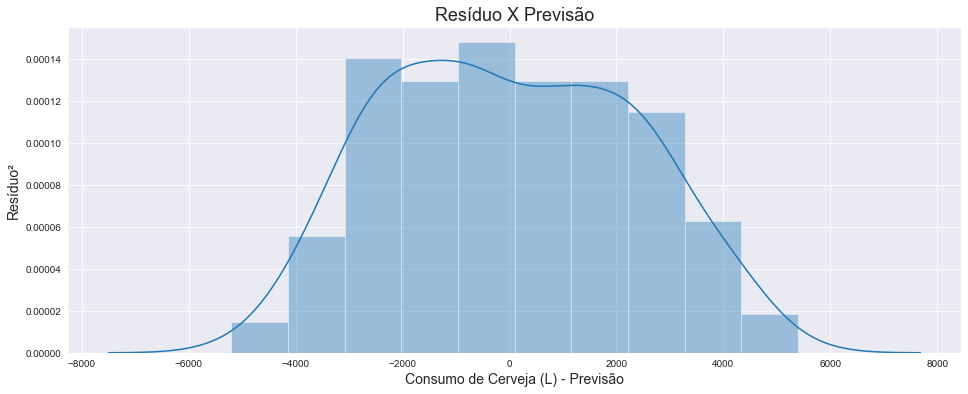

In [44]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(16,6)
ax.set_title('Resíduo X Previsão',fontsize=18)
ax.set_xlabel('Consumo de Cerveja (L) - Previsão', fontsize=14)
ax.set_ylabel('Resíduo²',fontsize=14)
ax

## Fiz o mesmo modelo, mas utilizando "temp_media" ao invés de "temp_max", para ver se tem muita diferença

In [45]:
X2 = df[['temp_media','chuva','fds']]

In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.30, random_state=2811)

In [47]:
modelo_2 = LinearRegression()

In [48]:
modelo_2.fit(X2_train,y2_train)

LinearRegression()

### Obtendo o score R² do novo modelo, e comparando com o antigo

In [49]:
print('Modelo com Temp. Média')
print(f"R² = {(modelo_2.score(X2_train,y2_train).round(2))}")

Modelo com Temp. Média
R² = 0.66


In [50]:
print('Modelo com Temp. Máxima')
print(f"R² = {(modelo.score(X_train,y_train).round(2))}")

Modelo com Temp. Máxima
R² = 0.73


### Gerando as Previsões

In [51]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

### Obtendo o score R² das previsões dos dois modelos e comparando

In [52]:
print('Modelo com Temp.Média')
print(f"R² = {metrics.r2_score(y_test,y_previsto_2).round(2)}")

Modelo com Temp.Média
R² = 0.66


In [53]:
print('Modelo com Temp.Máxima')
print(f"R² = {metrics.r2_score(y_test,y_previsto).round(2)}")

Modelo com Temp.Máxima
R² = 0.69


**Assim, o modelo utilizando a Temperatura Máxima mostra melhor desempenho.**

### Métricas de Erro

- **MSE** - Erro Quadrático Médio<br>
- **RMSE** - Raiz do Erro Quadrático Médio

In [54]:
MSE = metrics.mean_squared_error(y_test,y_previsto).round(2)
RMSE = np.sqrt(MSE).round(2)
R2 = metrics.r2_score(y_test,y_previsto).round(2)

pd.DataFrame([MSE,RMSE,R2],['MSE','RMSE','R²'],columns=['Métricas'])

,Métricas
MSE,5471976.38
RMSE,2339.23
R²,0.69


## Tentativa de Previsão Pontual

In [55]:
# Dado de Entrada

entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [56]:
# Gerando a Previsão

modelo.predict(entrada)[0]

26094.901775262017

In [57]:
# Simulador para Teste
df = pd.DataFrame(data=X, columns=['temp_max', 'chuva', 'fds'])
modelo.fit(df, y)

temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max,chuva,fds]]

print(f"{modelo.predict(entrada)[0]:.2f} litros.")

38357.87 litros.
